# Load Processed Data 

In [1]:
%run ./Airbnb_DataSource_n_DataWrangling.ipynb

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


total 3162
-rw-r--r-- 1 khyat 197609 3124181 Sep 26 15:50 Airbnb.pptx
drwxr-xr-x 1 khyat 197609       0 Oct  1 13:05 Data
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:22 Data_Original
drwxr-xr-x 1 khyat 197609       0 Oct  3 01:37 Data_Output
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:55 Temp
drwxr-xr-x 1 khyat 197609       0 Oct  2 23:55 Visualization_Output
-rw-r--r-- 1 khyat 197609      39 May  9 10:15 apikey.txt
-rw-r--r-- 1 khyat 197609   94729 Oct  3 01:56 treeClassifier.txt
-rw-r--r-- 1 khyat 197609     165 Sep 26 13:19 ~$Airbnb.pptx


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
./Airbnb_DataSource_n_DataWrangling.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [
./Airbnb_DataSource_n_DataWrangling.ipynb:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  "cells": [
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [2]:
df.head(n=2)
# print(df.shape)

,id,scrape_id,last_scraped,name,summary,description,experiences_offered,host_id,host_name,host_since,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_group,room_type_num
0,13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,My bright double bedroom with a large window h...,business,54730,Alina,2009-11-16,...,moderate,f,f,3,1,2,0,0.15,medium,0
1,15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Lots of windows and light. St Luke's Gardens ...,romantic,60302,Philippa,2009-12-05,...,strict_14_with_grace_period,t,t,1,1,0,0,0.73,medium,1


# Exploratory Data Analysis

### Price Hist Distribution

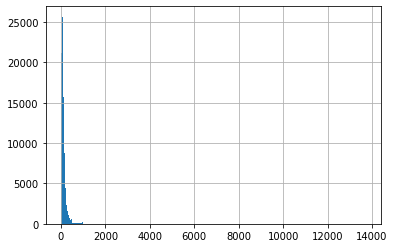

In [4]:
df_input.price.hist(bins=300)

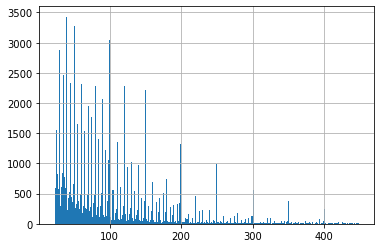

In [5]:
df.price.hist(bins=300)

The costest listing is 13700 dollars/night for 7 people. It's also strange to note that the price is 0 dollars/night for some listings which is not ideally possible. So, we are dropping 2.5 quantile from both extremes - low and high in the data processing notebook.

In [3]:
df_input.loc[df_input['price'].idxmax()][['id','name','price', 'accommodates']]

id                    28169774
name            Dome Penthouse
price                    13700
accommodates                 7
Name: 57306, dtype: object

### Relation between price and Number of Reviews
Number of reviews will be more for lower cost places which is evident from below figure.
If there are negative reviews, people won't go to that place and the number of reviews will go down.
So lower the price and better the place, more will be number of reviews.

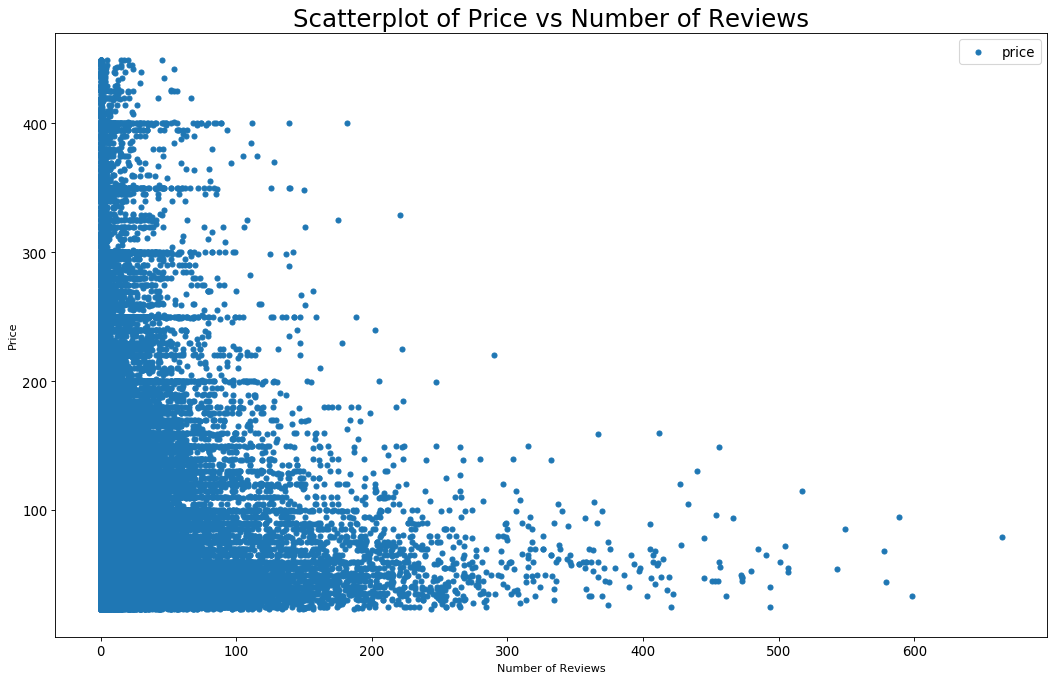

In [26]:
# Draw Plot
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('number_of_reviews', 'price',data=df, s=20)
# Decorations
plt.gca().set(xlabel='Number of Reviews', ylabel='Price')
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12)
plt.title("Scatterplot of Price vs Number of Reviews", fontsize=22)
plt.legend(fontsize=12)    
# plt.show() 
plt.savefig('Visualization_Output\PriceReviews.png')

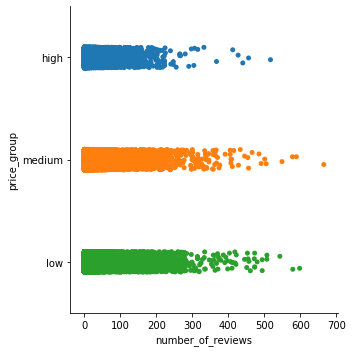

In [27]:
sns_plot = sns.catplot(x="number_of_reviews", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceReviews2.png")

### Price vs Minimum nights
Generally, Lower price listings should have less minimum number of nights.
But we don't see such strong relation between them.

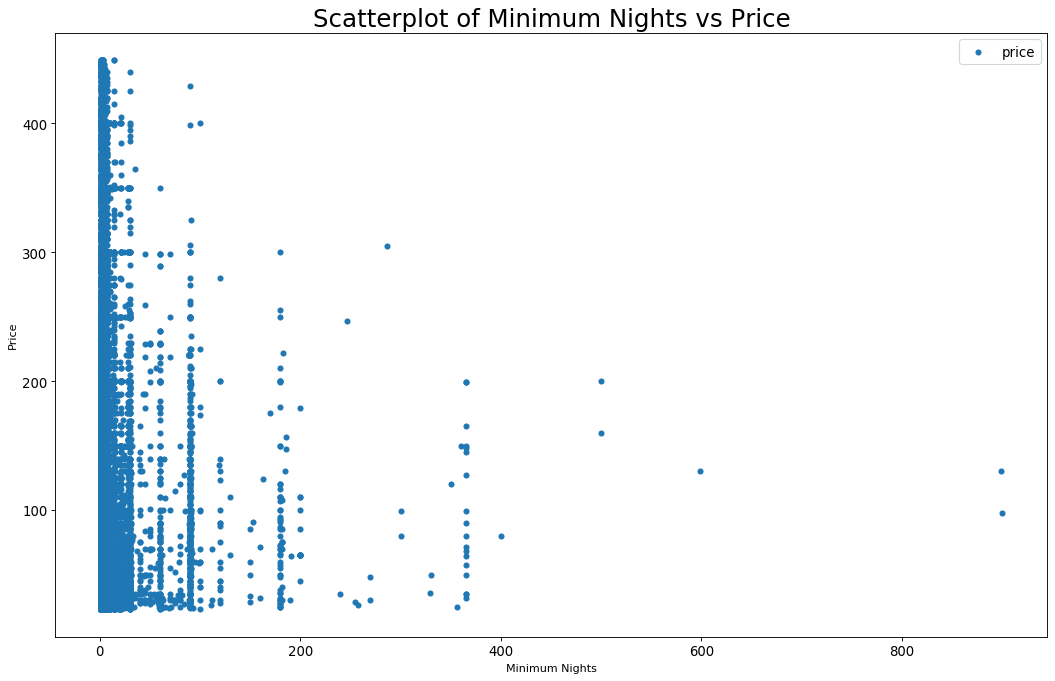

In [28]:
# Draw Plot
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('minimum_nights', 'price',data=df, s=20)
# Decorations
plt.gca().set(xlabel='Minimum Nights', ylabel='Price')
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12)
plt.title("Scatterplot of Minimum Nights vs Price", fontsize=22)
plt.legend(fontsize=12)    
plt.savefig('Visualization_Output\PriceMinNights.png')

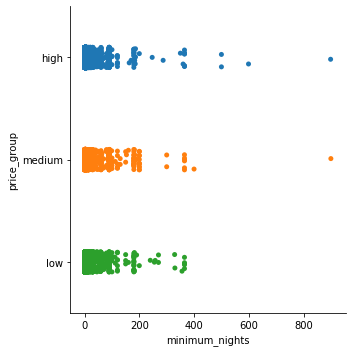

In [29]:
sns_plot = sns.catplot(x="minimum_nights", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceMinNights2.png")

### Room Type vs Price
Prices are high for entire apt which is as expected. Then for private rooms followed by shared rooms. This variable has good correlation with price.

C:\Users\khyat\.conda\envs\R_Work\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


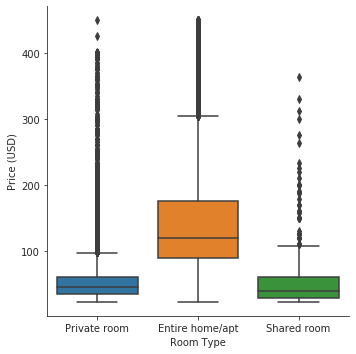

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("room_type", "price", data=df, kind="box")
    g.set_axis_labels("Room Type", "Price (USD)");
g.savefig("Visualization_Output\PriceRoomType.png")

### Number of Listings vs Price
We don't see much correlation of number of listings with price using the below graph.

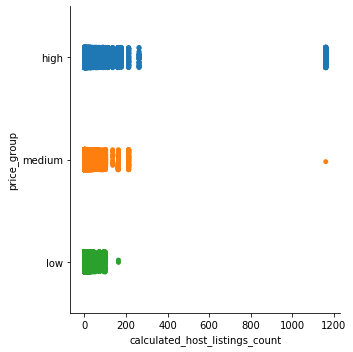

In [21]:
sns_plot = sns.catplot(x="calculated_host_listings_count", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceHostListings.png")

### Availability vs Price
There is no correlation of price with availability features.

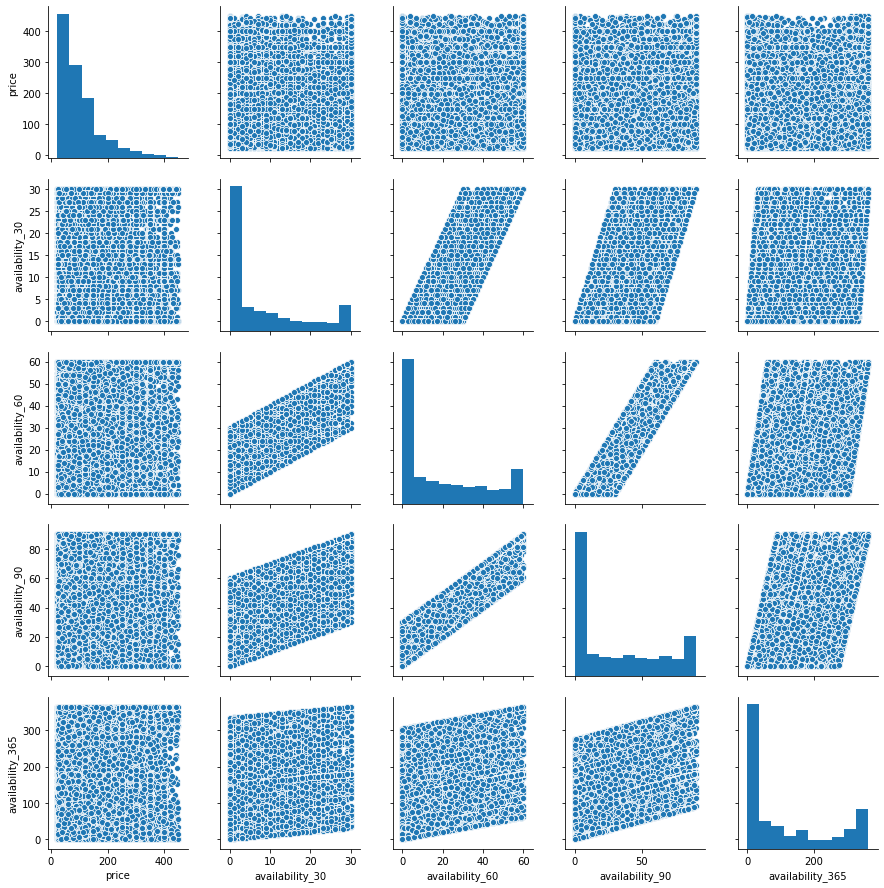

In [25]:
sns_plot = sns.pairplot(df[["price", "has_availability", "availability_30", "availability_60","availability_90", "availability_365"]])
sns_plot.savefig("Visualization_Output\PairPlot2.png")